Esse Notebook explora diferentes formas de implementar uma busca por profundidade.

In [1]:
import sys; sys.path.append('..')

In [2]:
from IPython.display import YouTubeVideo, Image

In [3]:
from collections import deque, defaultdict

In [4]:
from graph import Graph

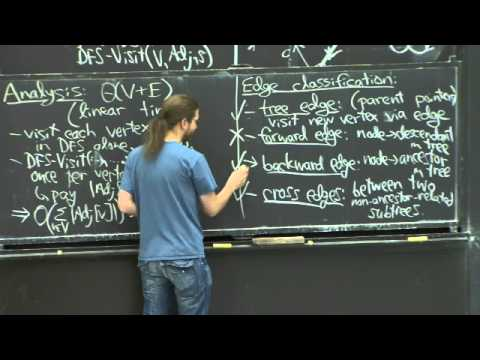

In [5]:
YouTubeVideo(id='AfSk24UTFS8')

In [6]:
def dfs_mit(graph):
    
    parent = dict()
    
    def visit(node, depth=0):
        depth += 1
        for v in graph.adjacent_to(node):
            if v not in parent:
                parent[v] = {'p' : node, 'depth' : depth} 
                visit(v, depth)
                
    for s in graph.vertices:
        if s not in parent:
            parent[s] = {'p' : None, 'depth': 0}
            visit(s)
            
    return parent

In [7]:
# exemplo com um grafo desconexo (grafo abc_srt mas sem a aresta 'cs')
aa = Graph(edges={
    'A' : {'B' : 5, 'C' : 3},
    'C' : {'A' : 3},
    'B' : {'A' : 5},
    'R' : {'S' : 4, 'T' : 1},
    'S' : {'R' : 4},
    'T' : {'R' : 1}
})

dfs_mit(aa)

{'A': {'p': None, 'depth': 0},
 'B': {'p': 'A', 'depth': 1},
 'C': {'p': 'A', 'depth': 1},
 'R': {'p': None, 'depth': 0},
 'S': {'p': 'R', 'depth': 1},
 'T': {'p': 'R', 'depth': 1}}

In [8]:
bb = Graph(edges={
    'E' : {'C' : 5},
    'A' : {'I' : 4},
    'D' : {'C' : 8, 'I' : 5},
    'C' : {'D' : 8, 'E' : 5},
    'I' : {'D' : 5, 'A' : 4}
})

dfs_mit(bb)

{'E': {'p': None, 'depth': 0},
 'C': {'p': 'E', 'depth': 1},
 'D': {'p': 'C', 'depth': 2},
 'I': {'p': 'D', 'depth': 3},
 'A': {'p': 'I', 'depth': 4}}

In [9]:
def dfs1(graph, start):
    
    stack = deque()
    stack.append(start)
    
    visited = set()
    previous = {start : None}
    
    while stack:
        v = stack.pop()
        
        for u in graph.adjacent_to(v):
            if u not in previous:
                stack.append(u)
                previous[u] = v                    
                
    return previous

In [10]:
bb = Graph(edges={
    'E' : {'C' : 5},
    'A' : {'I' : 4, 'B' : 3},
    'B' : {'A' : 3, 'C' : 7},
    'D' : {'C' : 8, 'I' : 5},
    'C' : {'D' : 8, 'E' : 5, 'B' : 7},
    'I' : {'D' : 5, 'A' : 4}
})

dfs1(bb,'E')

{'E': None, 'C': 'E', 'D': 'C', 'B': 'C', 'A': 'B', 'I': 'A'}

In [11]:
def dfs2(graph, start):
    
    stack = deque()
    visited = set([start])
    
    prev = dict()
    order = dict()
    count = 1
    prev[start] = None
    
    stack.append(start)
    
    while stack:
        v = stack.pop()
        order[v] = count
        count += 1
        visited.add(v)
        for w in graph.adjacent_to(v):
            if (w not in visited) and (w not in stack) :
                stack.append(w)
                prev[w] = v
                
#         print(stack)

    return prev, order

In [12]:
dfs2(bb,'C')

({'C': None, 'D': 'C', 'E': 'C', 'B': 'C', 'A': 'B', 'I': 'A'},
 {'C': 1, 'B': 2, 'A': 3, 'I': 4, 'E': 5, 'D': 6})

---

In [13]:
def dfs_even(graph, start):
    
    prev = {start : None}
    depth = {start : 1}
    i = 1

---

In [14]:
def gen_adj(red, blue):
    
    def adj(node):
        
        visited = set()
        
        for w in red.adjacent_to(node):
            visited.add(w)
            yield w
        
        for w in blue.adjacent_to(node):
            if w not in visited:
                visited.add(w)
                yield w
            
    return adj

---

In [15]:
# aa = Graph(edges={
#     'A' : {'B' : 5, 'C' : 3},
#     'C' : {'A' : 3, 'S' : 6},
#     'B' : {'A' : 5},
#     'R' : {'S' : 4, 'T' : 1},
#     'S' : {'R' : 4 , 'G': 15},
#     'T' : {'R' : 1},
#     'G' : {'C' : 14, 'S' : 15}
# })

In [16]:
# bb = Graph(edges={
#     'D' : {'A' : 2, 'C' : 4, 'B': 3},
#     'A' : {'D' : 2},
#     'C' : {'D' : 4, 'G' : 14},
#     'B' : {'D' : 3},
#     'T' : {'S' : 10},
#     'S' : {'T' : 10, 'G' : 15},
#     'G' : {'C' : 14, 'S' : 15}
# })

In [17]:
aa = Graph(edges={
    'E' : {'C' : 5},
    'C' : {'E' : 5, 'B' : 7},
    'B' : {'A' : 3, 'C' : 7},
    'A' : {'B' : 3}
})

In [18]:
bb = Graph(edges={
    'E' : {'C' : 5},
    'A' : {'I' : 4},
    'D' : {'C' : 8, 'I' : 5},
    'C' : {'D' : 8, 'E' : 5},
    'I' : {'D' : 5, 'A' : 4}
})